## 네이버 스포츠뉴스 --> 워드클라우드

In [9]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup


- 네이버 스포츠 뉴스 크롤링

In [10]:
sports = ['kbaseball','wbaseball','kfootball','wfootball','basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
suffix_url = '/news/index?isphoto=N&page='

In [24]:
driver = webdriver.Chrome()
url = f'{base_url}kbaseball{suffix_url}1'
driver.get(url)

In [12]:
# 기사 목록
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [13]:
# 기사 제목
li = lis[0]
title = li.select_one('.title').get_text().strip()
title

'SSG 베테랑 노경은-고효준의 ‘팀 내 최다등판’을 어떻게 봐야 할까?'

- 종목별로 몇 페이지가 있는지 확인하기

In [14]:
# 10 페이지가 넘는 종목 선택
url = f'{base_url}wfootball{suffix_url}1'
driver.get(url)

In [15]:
sports_dict = {}
for sport in sports:
    url = url = f'{base_url}{sport}{suffix_url}1'
    driver.get(url)
    time.sleep(2)
    next_clicked = 0    
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:             # 모든 종목의 마지막 페이지가 있는 화면
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            if next_clicked == 0:
                num_pages = len(pages) + 1
            else:
                num_pages = next_clicked * 10 + len(pages)
            sports_dict[sport] = num_pages
            break

sports_dict

{'kbaseball': 8,
 'wbaseball': 5,
 'kfootball': 8,
 'wfootball': 15,
 'basketball': 7,
 'volleyball': 5,
 'golf': 3,
 'general': 12}

- 모든 종목, 모든 페이지에 대해서 타이틀 가져오기

In [17]:
driver = webdriver.Chrome()                             # 1. 페이지 다시열기
title_list = []                                         # 2. 빈 리스트 또는 빈 스트링 만들기
for sport, num_pages in sports_dict.items():            # 3. 전체기사 URL 불러오기
    for page in range(1, num_pages+1):
        url = f'{base_url}{sport}{suffix_url}{page}'
        driver.get(url)
        time.sleep(2) 
        
        soup = BeautifulSoup(driver.page_source, 'html.parser')     # 4. 페이지에 있는 기사 목록 불러오기
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            title = li.select_one('.title').get_text().strip()      # 5. 모든 기사 타이틀 불러오기
            title_list.append(title)                                # 6. 타이틀을 빈 리스트에 저장

driver.close()                                                      # 7. 깔끔하게 드라이버 닫기



In [25]:
titles = ''                                                         # 1. 빈 리스트 또는 빈 스트링 만들기
for sport, num_pages in sports_dict.items():                        # 2. 전체기사 URL 불러오기
    for page in range(1, num_pages+1):
        url = f'{base_url}{sport}{suffix_url}{page}'
        driver.get(url)
        time.sleep(2) 
        
        soup = BeautifulSoup(driver.page_source, 'html.parser')     # 3. 페이지에 있는 기사 목록 불러오기
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            titles += li.select_one('.title').get_text().strip()    # 4. 모든 기사 타이틀 불러와서 빈 스트링에 저장
                                                                    



In [22]:
titles.count('\n')
driver.close()                                                      # 5. 깔끔하게 드라이버 닫기

0

- Word Cloud 만들기

In [18]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [27]:
okt = Okt()
tokens = okt.nouns(titles)
tokens[:10]

['송영진', '이닝', '엘리', '아스', '등판', '강', '생존', '싸움', '전', '마운드']

- 사각형 워드 클라우드

In [31]:
news = nltk.Text(tokens, name='스포츠 기사')
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path='C:/Windows/Fonts/malgun.ttf', relative_scaling=0.4
).generate_from_frequencies(dict(news.vocab().most_common(300)))

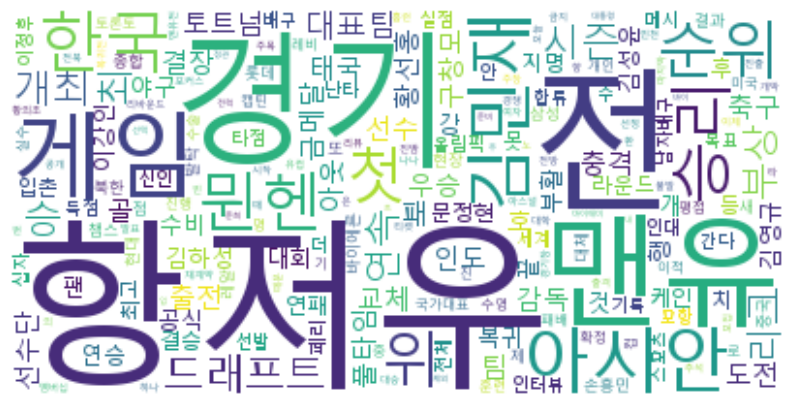

In [32]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

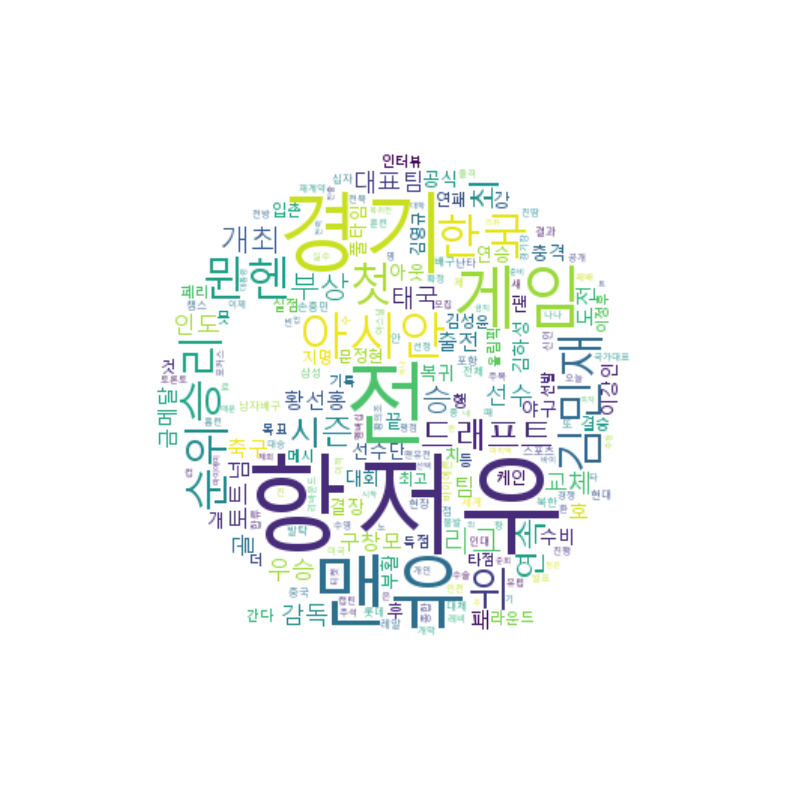

In [35]:
mask = np.array(Image.open('data/ball.jpg'))
wc = WordCloud(
        background_color='white', random_state=2023, mask=mask,
        font_path='C:/Windows/Fonts/malgun.ttf', relative_scaling=0.4
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');